Predicting Heart Disease

In [1]:
import pandas as pd
heart_disease = pd.read_csv('./Downloads/heart.csv')
print(heart_disease.head())
print(heart_disease.shape)

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
(918, 12)


In [2]:
print(heart_disease.dtypes)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.min_rows', 500)
summary = heart_disease.describe()
medians = medians = heart_disease.median()
summary.loc['median'] = medians
summary = summary.loc[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]
print(summary)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
               Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count   918.000000  918.000000   918.000000  918.000000  918.000000   
mean     53.510893  132.396514   198.799564    0.233115  136.809368   
median   54.000000  130.000000   223.000000    0.000000  138.000000   
std       9.432617   18.514154   109.384145    0.423046   25.460334   
min      28.000000    0.000000     0.000000    0.000000   60.000000   
25%      47.000000  120.000000   173.250000    0.000000  120.000000   
50%      54.000000  130.000000   223.000000    0.000000  138.000000   
75%      60.000000  140.000000   267.000000    0.000000  156.000000   
max      77.000000  200.000000   60

/var/folders/7g/05cm4jj579vf7_ghn0gwcsc00000gn/T/ipykernel_6824/798968727.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians = medians = heart_disease.median()


There are minimum values of 0 for RestingBP, Cholesterol which seem to low. The 60 min for max heart rate seems low too. (Apparently 60 is the minimum allowed for that category.)

In [3]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


No clear missing values. Though some missing values could be represented by something like 0. That would explain the RestingBP and Cholesterol values of 0.

Making Bar Charts for categorical columns

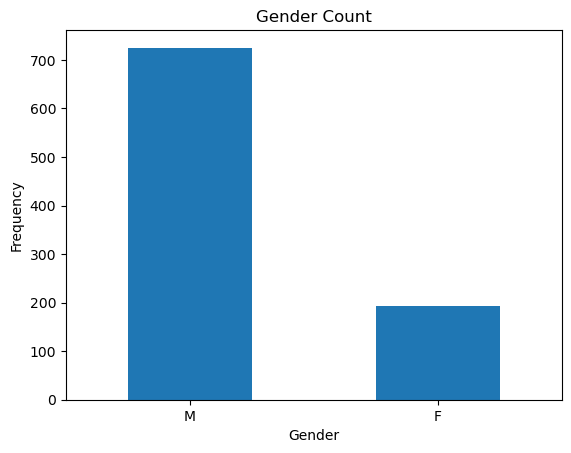

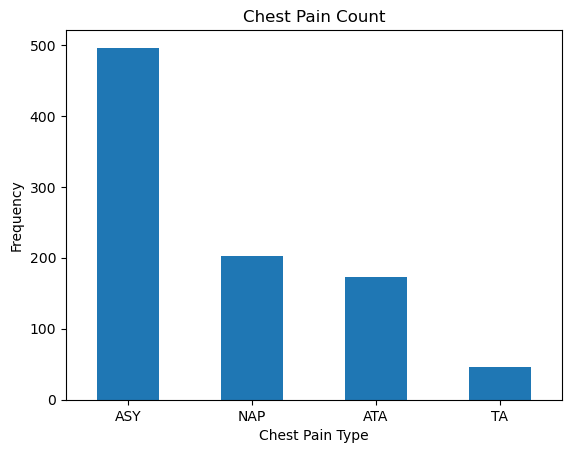

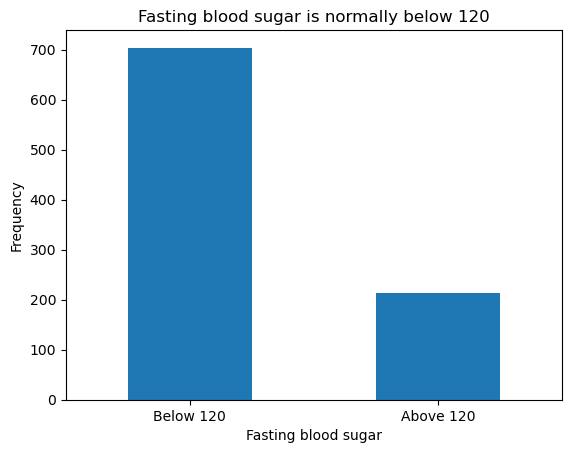

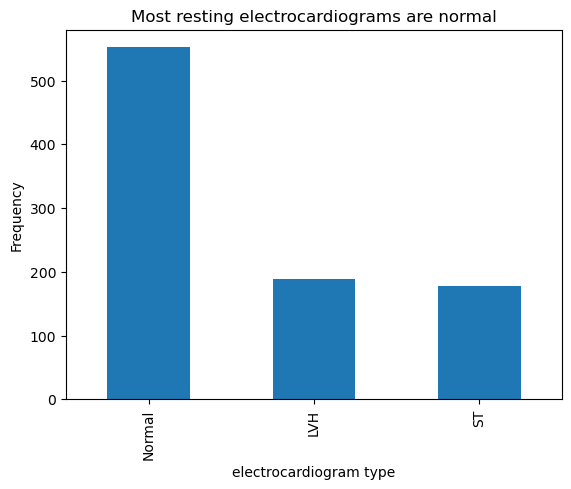

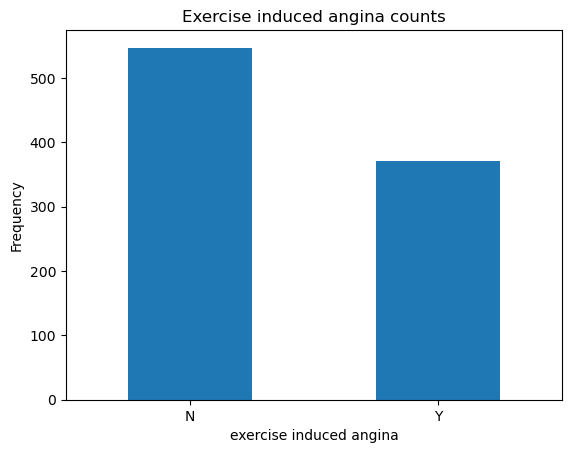

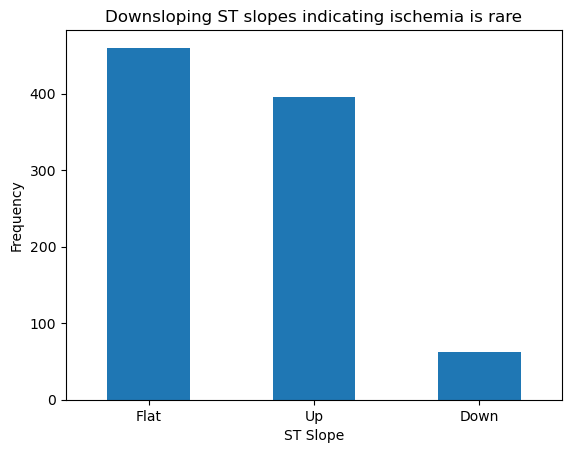

1    508
0    410
Name: HeartDisease, dtype: int64


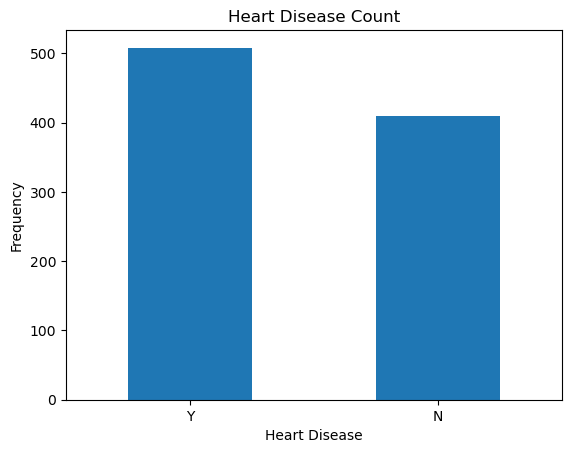

In [4]:
# categorical_columns = heart_disease[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope','HeartDisease']]

import matplotlib.pyplot as plt

sex_series = heart_disease['Sex']
sex_series_value_counts = sex_series.value_counts()
# print(sex_series.unique())
# print(sex_series.value_counts())
# print(sex_series.max())
# print(sex_series.value_counts()[0])
# plt.bar(x=sex_series_value_counts.index, height=sex_series_value_counts.values) # This works too 
# plt.show()
sex_series_value_counts.plot.bar()
plt.xticks(rotation=360)
plt.title('Gender Count')
plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.show()

chest_pain_series = heart_disease['ChestPainType']
# print(chest_pain_series.unique())
chest_pain_series_value_counts = chest_pain_series.value_counts()
# print(chest_pain_series_value_counts)
chest_pain_series_value_counts.plot.bar()
plt.xticks(rotation=360)
plt.title('Chest Pain Count')
plt.ylabel('Frequency')
plt.xlabel('Chest Pain Type')
plt.show()

fasting_bs_series = heart_disease['FastingBS']
# print(fasting_bs_series.unique())
fasting_bs_value_counts = fasting_bs_series.value_counts()
# print(fasting_bs_value_counts)
fasting_bs_value_counts.plot.bar()
plt.xticks(rotation=360, ticks=[0,1], labels=['Below 120', 'Above 120'])
plt.title('Fasting blood sugar is normally below 120')
plt.ylabel('Frequency')
plt.xlabel('Fasting blood sugar')
plt.show()

resting_ecg_series = heart_disease['RestingECG']
# print(resting_ecg_series.unique())
resting_ecg_value_counts = resting_ecg_series.value_counts()
# print(resting_ecg_value_counts)
resting_ecg_value_counts.plot.bar()
plt.title('Most resting electrocardiograms are normal')
plt.ylabel('Frequency')
plt.xlabel('electrocardiogram type')
plt.show()

exercise_angina_series = heart_disease['ExerciseAngina']
# print(exercise_angina_series.unique())
exercise_angina_value_counts = exercise_angina_series.value_counts()
exercise_angina_value_counts.plot.bar()
plt.xticks(rotation=360)
plt.title('Exercise induced angina counts')
plt.ylabel('Frequency')
plt.xlabel('exercise induced angina')
plt.show()

st_slope_series = heart_disease['ST_Slope']
# print(st_slope_series.unique())
st_slope_value_counts = st_slope_series.value_counts()
st_slope_value_counts.plot.bar()
plt.xticks(rotation=360)
plt.title('Downsloping ST slopes indicating ischemia is rare')
plt.ylabel('Frequency')
plt.xlabel('ST Slope')
plt.show()

heart_disease_series = heart_disease['HeartDisease']
# print(heart_disease_series.unique())
print(heart_disease_series.value_counts())
heart_disease_value_counts = heart_disease_series.value_counts()
heart_disease_value_counts.plot.bar()
plt.xticks(rotation=360, ticks=[0,1], labels=['Y', 'N']) # I'm not sure why this works
plt.title('Heart Disease Count')
plt.ylabel('Frequency')
plt.xlabel('Heart Disease')
plt.show()

Is there any reason the sample has a lot more men?

Now I'm going to make charts grouping the data by heart disease

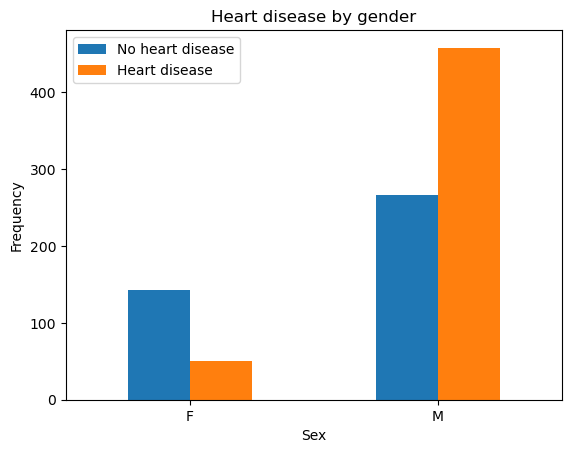

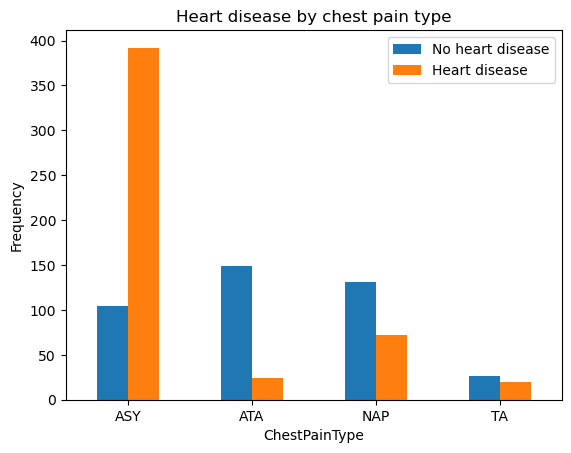

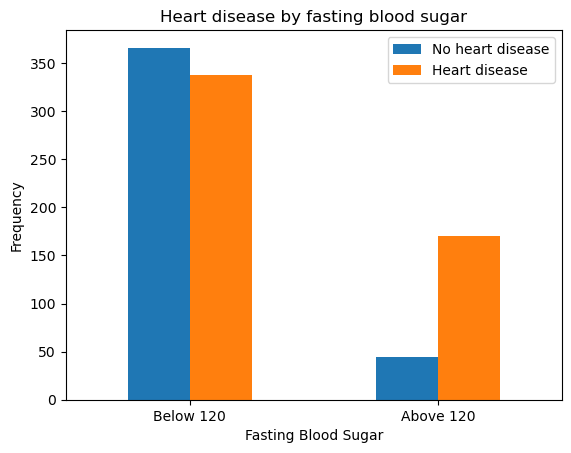

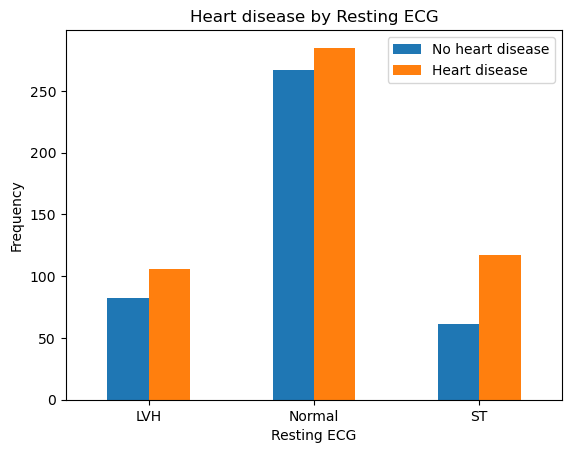

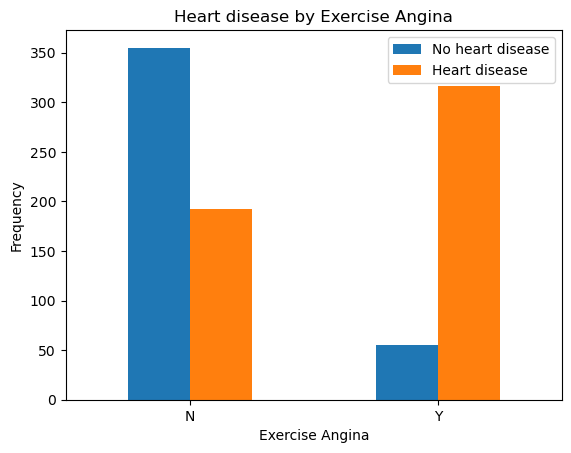

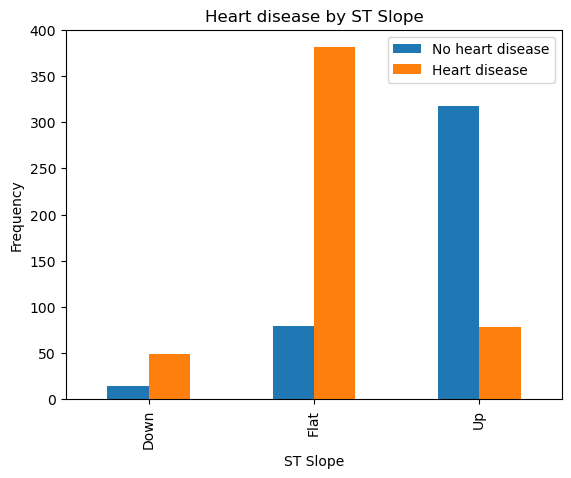

In [5]:
grouped_data = heart_disease.groupby(['HeartDisease', 'Sex']).size().reset_index(name='count')
pivoted_data = grouped_data.pivot(index='Sex', columns='HeartDisease', values='count')
pivoted_data.columns = ['No heart disease', 'Heart disease']
pivoted_data.plot(kind='bar')
plt.xticks(rotation=360)
plt.ylabel('Frequency')
plt.title('Heart disease by gender')
plt.show()

grouped_data = heart_disease.groupby(['HeartDisease', 'ChestPainType']).size().reset_index(name='count')
pivoted_data = grouped_data.pivot(index='ChestPainType', columns='HeartDisease', values='count')
pivoted_data.columns = ['No heart disease', 'Heart disease']
pivoted_data.plot(kind='bar')
plt.xticks(rotation=360)
plt.ylabel('Frequency')
plt.title('Heart disease by chest pain type')
plt.show()

grouped_data = heart_disease.groupby(['HeartDisease', 'FastingBS']).size().reset_index(name='count')
pivoted_data = grouped_data.pivot(index='FastingBS', columns='HeartDisease', values='count')
pivoted_data.columns = ['No heart disease', 'Heart disease']
pivoted_data.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Fasting Blood Sugar')
plt.title('Heart disease by fasting blood sugar')
plt.xticks(rotation=360, ticks=[0,1], labels=['Below 120', 'Above 120'])
plt.show()

grouped_data = heart_disease.groupby(['HeartDisease', 'RestingECG']).size().reset_index(name='count')
pivoted_data = grouped_data.pivot(index='RestingECG', columns='HeartDisease', values='count')
pivoted_data.columns = ['No heart disease', 'Heart disease']
pivoted_data.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Resting ECG')
plt.title('Heart disease by Resting ECG')
plt.xticks(rotation=360)
plt.show()

grouped_data = heart_disease.groupby(['HeartDisease', 'ExerciseAngina']).size().reset_index(name='count')
pivoted_data = grouped_data.pivot(index='ExerciseAngina', columns='HeartDisease', values='count')
pivoted_data.columns = ['No heart disease', 'Heart disease']
pivoted_data.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Exercise Angina')
plt.title('Heart disease by Exercise Angina')
plt.xticks(rotation=360)
plt.show()

grouped_data = heart_disease.groupby(['HeartDisease', 'ST_Slope']).size().reset_index(name='count')
pivoted_data = grouped_data.pivot(index='ST_Slope', columns='HeartDisease', values='count')
pivoted_data.columns = ['No heart disease', 'Heart disease']
pivoted_data.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('ST Slope')
plt.title('Heart disease by ST Slope')
# plt.xticks(rotation=360)
plt.show()

More indications men have more heart disease. I don't have enough domain expertise to understand ChestPainType, RestingECG, Exercise Angina and ST Slope.

In [6]:
resting_bp_is_zero_bool = heart_disease['RestingBP'] == 0
resting_bp_is_zero_rows = heart_disease[resting_bp_is_zero_bool]
print(resting_bp_is_zero_rows.shape[0])
print(resting_bp_is_zero_rows)
print('resting_bp_is_zero_rows.index below')
print(resting_bp_is_zero_rows.index)
try:
    print(resting_bp_is_zero_rows.index[0])
    zero_row_index = resting_bp_is_zero_rows.index[0]
    heart_disease = heart_disease.drop(zero_row_index)
except:
    print('already deleted')

cholesterol_is_zero_bool = heart_disease['Cholesterol'] == 0
cholesterol_is_zero_rows = heart_disease[cholesterol_is_zero_bool]
print(cholesterol_is_zero_rows.shape[0])
print(cholesterol_is_zero_rows)

# grouped_by_heart_disease = heart_disease.groupby(['HeartDisease'])
grouped_data = heart_disease.groupby('HeartDisease').agg({'Cholesterol': 'median'})
print(grouped_data)
no_heart_disease_median = grouped_data.iloc[0,0]
heart_disease_median = grouped_data.iloc[1,0]
# print(grouped_data['1'])

cholesterol_is_zero_and_no_heart_disease = (heart_disease['Cholesterol'] == 0) & (heart_disease['HeartDisease'] == 0)
cholesterol_is_zero_and_no_heart_disease_rows = heart_disease[cholesterol_is_zero_and_no_heart_disease].copy()
# def replace_zeros(value):
#     if value == 0:
#         return no_heart_disease_median
#     return value
    
# cholesterol_is_zero_and_no_heart_disease['Cholesterol'] = cholesterol_is_zero_and_no_heart_disease_rows.apply(replace_zeros)

cholesterol_is_zero_and_no_heart_disease_rows['Cholesterol'] = no_heart_disease_median
print(cholesterol_is_zero_and_no_heart_disease_rows['Cholesterol'])
print(cholesterol_is_zero_and_no_heart_disease_rows['Cholesterol'].shape[0])

cholesterol_is_zero_and_heart_disease = (heart_disease['Cholesterol'] == 0) & heart_disease['HeartDisease'] == 1
cholesterol_is_zero_and_heart_disease_rows = heart_disease[cholesterol_is_zero_and_heart_disease].copy()

# def replace_zeros_with_heart_disease_median(value):
#     if value == 0:
#         return heart_disease_median
#     return value

cholesterol_is_zero_and_heart_disease_rows['Cholesterol'] = heart_disease_median
print(cholesterol_is_zero_and_heart_disease_rows['Cholesterol'])
print(cholesterol_is_zero_and_heart_disease_rows['Cholesterol'].shape[0])


print(heart_disease['Cholesterol'].value_counts())
# heart_disease = heart_disease.merge(cholesterol_is_zero_and_heart_disease_rows, how='inner')
# print(heart_disease['Cholesterol'].value_counts())
# print(heart_disease.info())
heart_disease.update(cholesterol_is_zero_and_no_heart_disease_rows[['Cholesterol']])
heart_disease.update(cholesterol_is_zero_and_heart_disease_rows[['Cholesterol']])
print(heart_disease['Cholesterol'].value_counts())
print(heart_disease[['Cholesterol','RestingBP']].describe())

#Next figure out way to put the new cholesterol values into heart disease. Maybe find some sort of intersection / union ish thing I can do. Or do 1 function that iterates over the entire dataframe and replaces the values

1
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP          0            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N      1.5     Flat             1  
resting_bp_is_zero_rows.index below
Int64Index([449], dtype='int64')
449
171
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
293   65   M           ASY        115            0          0     Normal   
294   32   M            TA         95            0          1     Normal   
295   61   M           ASY        105            0          1     Normal   
296   50   M           ASY        145            0          1     Normal   
297   57   M           ASY        110            0          1         ST   
..   ...  ..           ...        ...          ...        ...        ...   
514   43   M           ASY        122            0          0     Normal   
515   63   M           NAP        130   

Create a Pearson's correlation heatmap

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.1+ KB
None
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR          

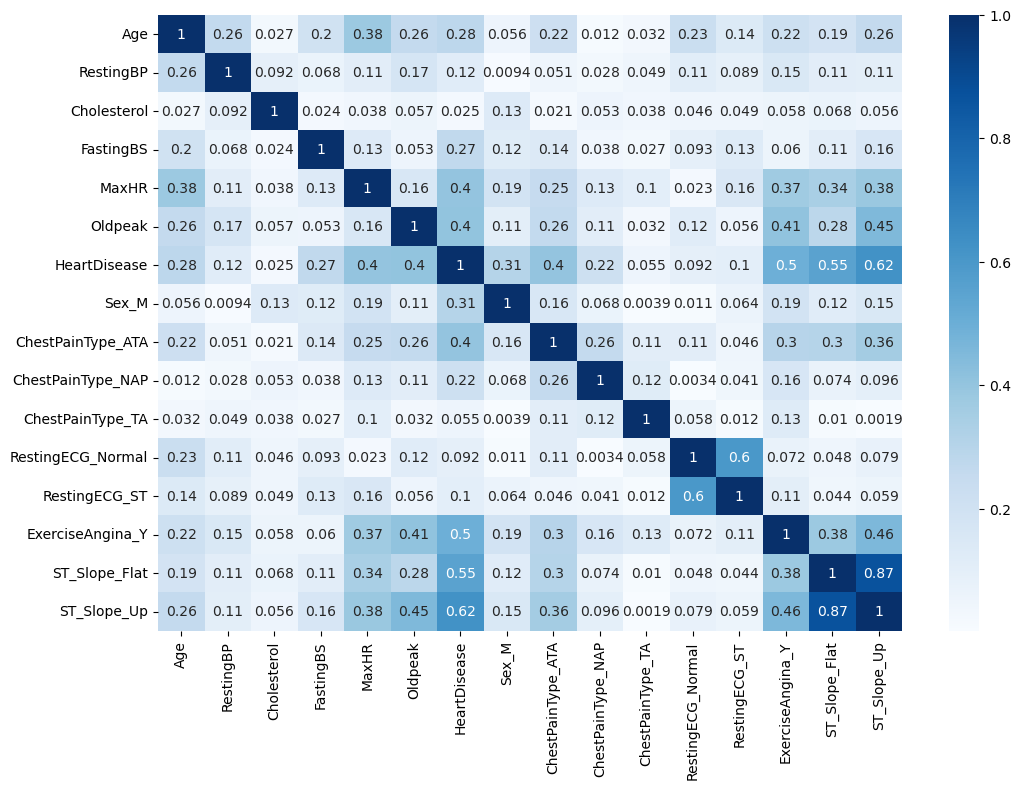

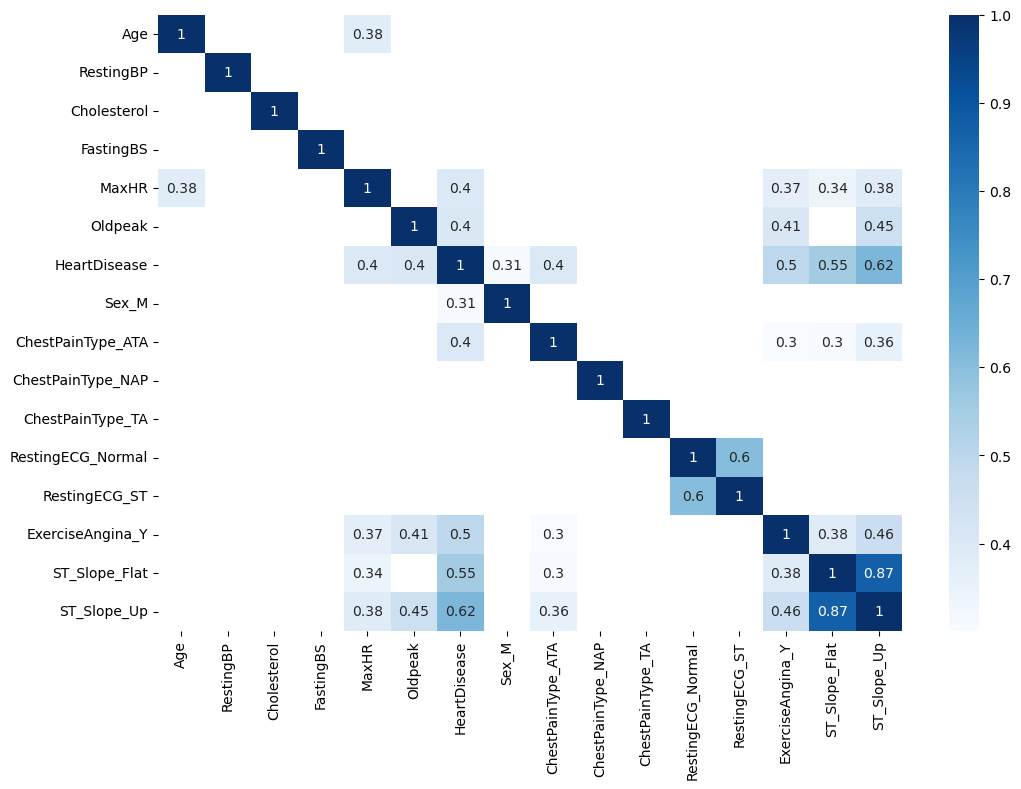

Age                  0.282012
RestingBP            0.117990
Cholesterol          0.024914
FastingBS            0.267994
MaxHR               -0.401410
Oldpeak              0.403638
HeartDisease         1.000000
Sex_M                0.305118
ChestPainType_ATA   -0.401680
ChestPainType_NAP   -0.215311
ChestPainType_TA    -0.054591
RestingECG_Normal   -0.092452
RestingECG_ST        0.103067
ExerciseAngina_Y     0.495490
ST_Slope_Flat        0.553700
ST_Slope_Up         -0.621843
dtype: float64


In [7]:
print(heart_disease.info())
print(heart_disease.dtypes)
print(heart_disease['Sex'].unique())
# heart_disease
heart_disease_dummy = pd.get_dummies(heart_disease, drop_first=True)
print(heart_disease_dummy.dtypes)

corr = abs(heart_disease_dummy.corr())
print(corr)
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(corr[corr > 0.3], annot=True, cmap="Blues")
plt.show()

corr_with_heart_disease = heart_disease_dummy.corrwith(heart_disease_dummy['HeartDisease'])
print(corr_with_heart_disease)


Correlations above .4 with heart disease
ST_Slope_Up 0.621843, ST_Slope_Flat 0.553700, ChestPainType_ASY .52, ExerciseAngina_N 0.495490, ExerciseAngina_Y 0.495490, ChestPainType_ATA 0.401680, MaxHR 0.401410, Oldpeak 0.403638, Sex_F 0.305118, Sex_M 0.305118

In [8]:
from sklearn.model_selection import train_test_split
df_clean = heart_disease_dummy
print(df_clean.info())
# print(df_clean.shape[0])
X = df_clean.drop('HeartDisease', axis=1)
y = df_clean['HeartDisease']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.15, random_state=417)
# print(X.shape[0])
# print(X_train.shape[0])
# print(X_test.shape[0])

from sklearn.neighbors import KNeighborsClassifier

features = [
    "Oldpeak",
    "Sex_M",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]
for feature in features:
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    print(f"The k-NN classifier trained on {feature} and with k = 3 has an accuracy of {accuracy*100:.2f}%")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                917 non-null    int64  
 1   RestingBP          917 non-null    int64  
 2   Cholesterol        917 non-null    float64
 3   FastingBS          917 non-null    int64  
 4   MaxHR              917 non-null    int64  
 5   Oldpeak            917 non-null    float64
 6   HeartDisease       917 non-null    int64  
 7   Sex_M              917 non-null    uint8  
 8   ChestPainType_ATA  917 non-null    uint8  
 9   ChestPainType_NAP  917 non-null    uint8  
 10  ChestPainType_TA   917 non-null    uint8  
 11  RestingECG_Normal  917 non-null    uint8  
 12  RestingECG_ST      917 non-null    uint8  
 13  ExerciseAngina_Y   917 non-null    uint8  
 14  ST_Slope_Flat      917 non-null    uint8  
 15  ST_Slope_Up        917 non-null    uint8  
dtypes: float64(2), int64(5), u

ST_Slope_Up Is the feature that performed best. Sex_M is the feature that performed worst. I guess this makes sense since for the most part the more heavily correlated features perform better. And there are so many more men than women that it's not surprising Sex doesn't perform as well with k nearest neighbors. (since men are more likely to be neighbors.) (But switching to weighting by distance didn't improve things either)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])
knn_instance = KNeighborsClassifier(n_neighbors = 3)
knn_instance.fit(X_train_scaled, y_train)
accuracy = knn_instance.score(X_val_scaled, y_val)
print(accuracy)


0.8405797101449275


It performed equally well as it did for ST_Slope_Up

In [19]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=417)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
grid_params = {'n_neighbors': range(1,20), 'metric': ['minkowski', 'manhattan'], 'p': [1,3]}
knn_grid_searched = KNeighborsClassifier()
grid_search_instance = GridSearchCV(knn_grid_searched, grid_params)
grid_search_fit = grid_search_instance.fit(X_train_scaled, y_train)
grid_search_fit_best_params = grid_search_fit.best_params_
print(grid_search_fit_best_params)
grid_search_fit_best_score = grid_search_fit.best_score_
print(grid_search_fit_best_score)
grid_search_best_estimator = grid_search_fit.best_estimator_
X_test_scaled = scaler.transform(X_test)
accuracy = grid_search_best_estimator.score(X_test_scaled, y_test)
print(accuracy)

{'metric': 'minkowski', 'n_neighbors': 19, 'p': 1}
0.8639040529363111
0.8840579710144928


Hyperparameter optimization is improving things a little bit. And the results are generalizing well to the test data.